In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

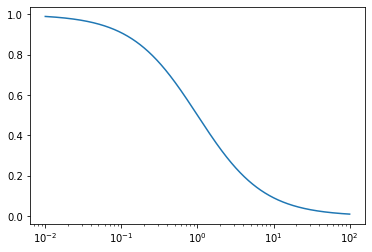

In [ ]:
def G(tau,C,D,r_0,z_0):
    return 1/(np.pi**(3/2)*r_0**2*z_0*C) * 1/(1 + 4*D*tau/r_0**2) * 1/np.sqrt(1 + 4*D*tau/z_0**2)

def large_alpha_G(tau,N,tau_d):
    return 1/N * 1/(1+tau/tau_d)

tau = np.logspace(-2,2,2000)
g = large_alpha_G(tau,1,1)
plt.semilogx(tau,g)

# Part a) Constant and Chopped Intensities

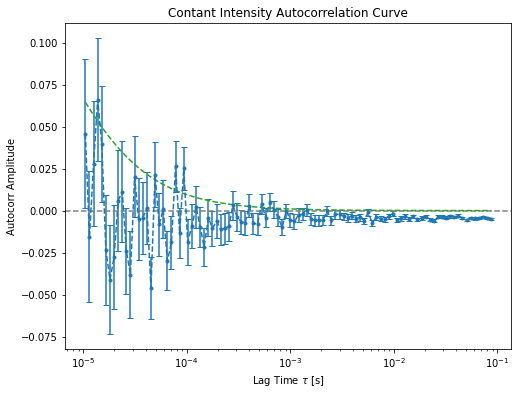

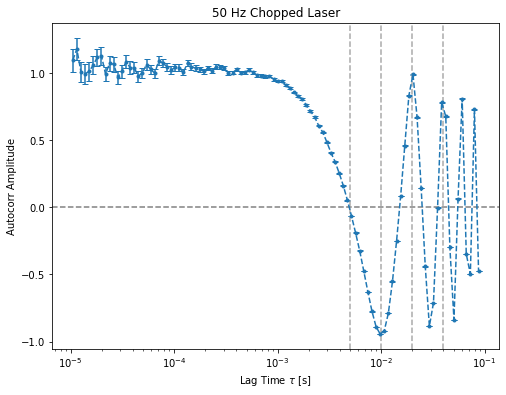

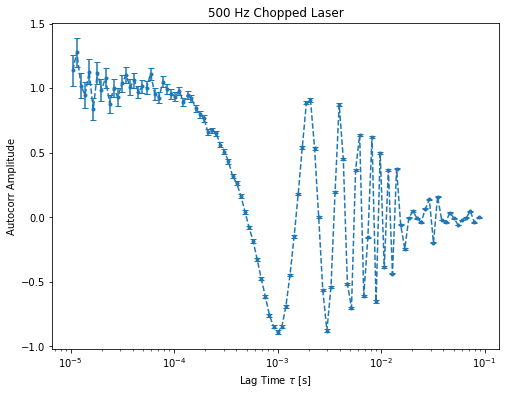

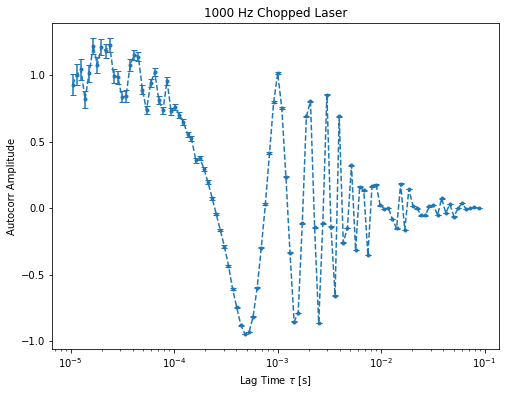

In [ ]:
# Constant
filename = 'data/no_choppa.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
plt.axhline(0,ls='--',color = "Grey")
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "Contant Intensity Autocorrelation Curve");

N_init = 5
tauD_init = 0.000005
xspace = np.linspace(np.min(tau),np.max(tau),100000)
G_byEye = large_alpha_G(xspace,N_init,tauD_init)
plt.plot(xspace,G_byEye,'C2--',label = "Characteristic Fit By Eye (large alpha)")

# Chopped 50 Hz
filename = '/work/data/a_chopper_50.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3,label = "Autocorr Data")
plt.axhline(0,ls='--',color = "Grey")
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "50 Hz Chopped Laser");

f = 50
T = 1/f
lineArr = [T,T/2,T/4,2*T]
for T_val in lineArr:
    plt.axvline(T_val,ls='--',color = "DarkGrey")

# Chopped 500 Hz
filename = '/work/data/a_chopper_500.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "500 Hz Chopped Laser");

# Chopped 1000 Hz
filename = '/work/data/a_chopper_1000.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
ax.set(xscale='log', xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "1000 Hz Chopped Laser");

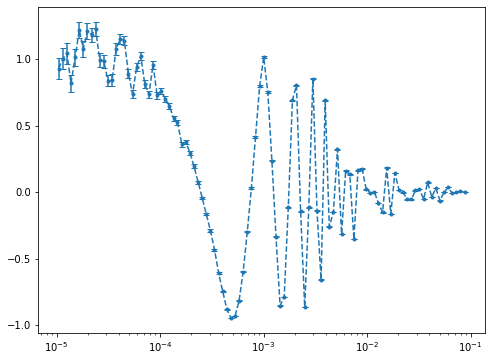

In [ ]:
filename = 'data/a_chopper_1000.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
ax.set(xscale='log');


# Part b) 

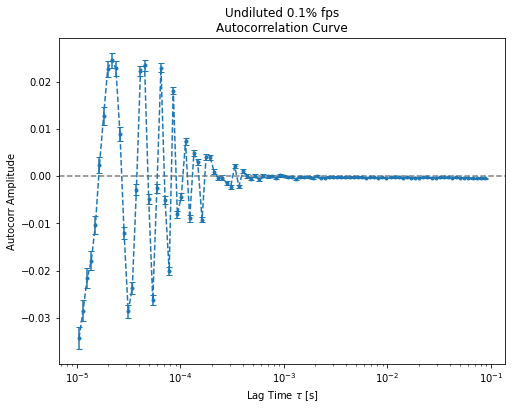

In [ ]:
# Undiluted
filename = '/work/data/trial2_pure_fps.txt'
tau, correlation, err = np.genfromtxt(filename, skip_header = 23, unpack = True)

fig, ax = plt.subplots(figsize = (8,6))
ax.errorbar(tau,correlation, yerr = err, fmt = '--.', capsize = 3)
plt.axhline(0,ls='--',color = "Grey")
ax.set( xlabel = r"Lag Time $\tau$ [s]", ylabel = "Autocorr Amplitude",
        title = "Undiluted 0.1% fps\nAutocorrelation Curve", xscale = 'log');


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1a2a632c-fb71-4ebc-b3fb-2171f4c31db5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>